# Import Libraries

In [5]:
import numpy as np
import pandas as pd
import missingno as msn

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Read Data

> takehome_users.csv

In [6]:
df1 = pd.read_csv('takehome_users.csv', encoding='latin-1')
pd.set_option('display.max_columns', None)
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [7]:
df1.shape

(12000, 10)

In [8]:
df1.info() # last_session_creation_time & invited_by_user_id have empty cells

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [9]:
df1.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


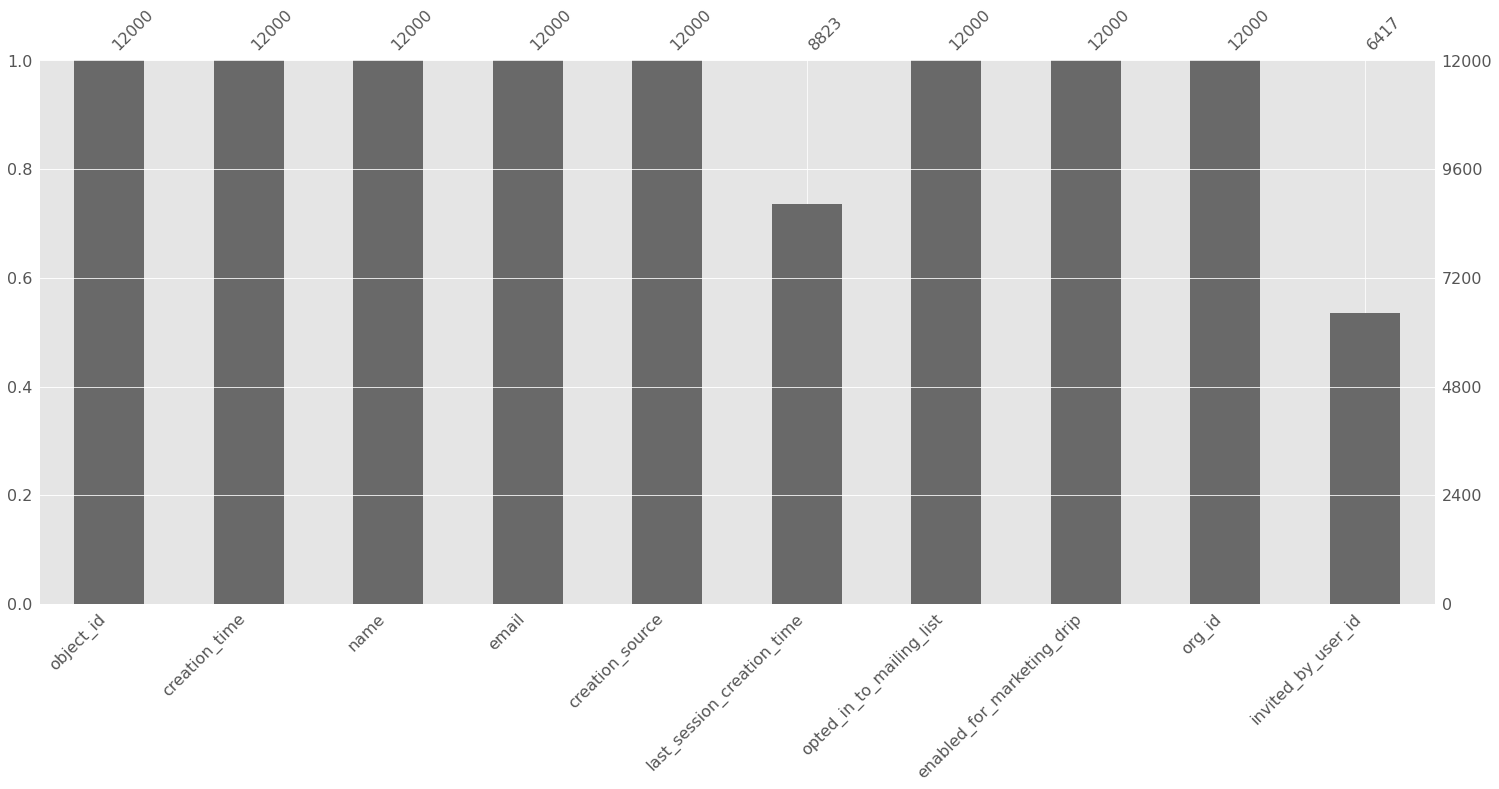

In [10]:
plt.figure(figsize=(10, 5))
# msn.matrix(df1)
msn.bar(df1) # Missing datas
plt.show()

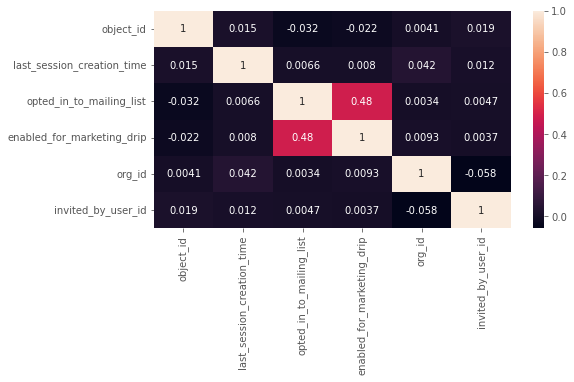

In [11]:
plt.figure(figsize=(8,4))
sns.heatmap(df1.corr(), annot=True)
plt.show()

> takehome_user_engagement.csv

In [12]:
df2 = pd.read_csv('takehome_user_engagement.csv')
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [13]:
df2.shape

(207917, 3)

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [15]:
df2.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [16]:
df2.corr()

,user_id,visited
user_id,1.0,NaN
visited,NaN,NaN


In [17]:
df2.nunique()

time_stamp    207220
user_id         8823
visited            1
dtype: int64

## Observation
-----------------
1. In df1, their are correlation between features which are over 5%.
2. opted_in_to_mailing_list and enabled_for_marketing_drip have correlation of 48%
3. org_id & invited_by_user_id have 2.8% correlation.
4. df2 have no correlation features.

# Pre-Processing

## df1 Column-wise

In [18]:
df1.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

object_id

In [19]:
print(df1.object_id.nunique(), df1.object_id.dtype)

12000 int64


In [20]:
df1.object_id.isnull().sum()

0

creation_time

In [21]:
print(df1.creation_time.nunique(), df1.creation_time.dtype)

11996 object


In [22]:
df1.creation_time = pd.to_datetime(df1.creation_time)
print(df1.creation_time.dtype)

datetime64[ns]


In [23]:
df1.creation_time.isnull().sum()

0

name

In [24]:
df1.name.nunique()

11349

In [25]:
df1.name.duplicated().sum()

651

In [26]:
df1.name.isnull().sum()

0

email

In [27]:
df1.email.nunique()

11980

In [28]:
df1.email.duplicated().sum()

20

In [29]:
df1.email.isnull().sum()

0

In [30]:
df1.email = df1.email.str.lower()

creation_source

In [31]:
df1.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [32]:
df1.creation_source.isnull().sum()

0

last_session_creation_time

In [33]:
df1.last_session_creation_time.value_counts()

1.401868e+09    2
1.401917e+09    2
1.398139e+09    1
1.381812e+09    1
1.400737e+09    1
               ..
1.393803e+09    1
1.343116e+09    1
1.382131e+09    1
1.373158e+09    1
1.390727e+09    1
Name: last_session_creation_time, Length: 8821, dtype: int64

In [34]:
df1.last_session_creation_time = pd.to_datetime(df1.last_session_creation_time, unit='s')
df1.last_session_creation_time.head()

0   2014-04-22 03:53:30
1   2014-03-31 03:45:04
2   2013-03-19 23:14:52
3   2013-05-22 08:09:28
4   2013-01-22 10:14:20
Name: last_session_creation_time, dtype: datetime64[ns]

In [35]:
df1.last_session_creation_time.fillna(df1.creation_time, inplace=True)

In [36]:
df1.last_session_creation_time.isnull().sum()

0

opted_in_to_mailing_list

In [37]:
df1.opted_in_to_mailing_list.value_counts()

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

In [38]:
df1.opted_in_to_mailing_list.isnull().sum()

0

enabled_for_marketing_drip

In [39]:
df1.enabled_for_marketing_drip.value_counts()

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

In [40]:
df1.enabled_for_marketing_drip.isnull().sum()

0

org_id

In [41]:
df1.org_id.isnull().sum()

0

In [42]:
df1.org_id.nunique()

417

invited_by_user_id

In [43]:
df1.invited_by_user_id.isnull().sum()

5583

In [44]:
# df1.invited_by_user_id = df1.invited_by_user_id.replace(np.nan, 0)

In [45]:
# df1.invited_by_user_id = df1.invited_by_user_id.astype('int')

In [46]:
df1.invited_by_user_id.value_counts()

10741.0    13
2527.0     12
1525.0     11
11770.0    11
2308.0     11
           ..
1390.0      1
5445.0      1
8526.0      1
4695.0      1
5450.0      1
Name: invited_by_user_id, Length: 2564, dtype: int64

In [47]:
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,augustcclausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,mitchellbottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,nicklassclausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,graceraw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


## df2 Column-wise

In [48]:
print(df2.columns, df2.shape)

Index(['time_stamp', 'user_id', 'visited'], dtype='object') (207917, 3)


time_stamp

In [49]:
print(df2.time_stamp.nunique(), df2.time_stamp.dtype)

207220 object


In [50]:
df2.time_stamp = pd.to_datetime(df2.time_stamp)
print(df2.time_stamp.dtype)

datetime64[ns]


In [51]:
df2.time_stamp.isnull().sum()

0

user_id

In [52]:
print(df2.user_id.nunique(), df2.user_id.dtype)

8823 int64


In [53]:
df2.user_id.isnull().sum()

0

visited

In [54]:
print(df2.visited.value_counts(), df2.visited.dtype)

1    207917
Name: visited, dtype: int64 int64


In [55]:
df2.visited.isnull().sum()

0

In [72]:
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


## Merge DataFrame df1 & df2

In [73]:
# We will merge data on object_id, so lets rename user_id in df2 to object_id
df2.rename(columns={'user_id':'object_id'}, inplace=True)
df2.head()

,time_stamp,object_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [74]:
df = pd.merge(df1, df2, how='outer', on='object_id')
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited
0,1,2014-04-22 03:53:30,Clausen August,augustcclausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,2014-04-22 03:53:30,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-11-15 03:45:04,1.0
2,2,2013-11-15 03:45:04,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-11-29 03:45:04,1.0
3,2,2013-11-15 03:45:04,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-12-09 03:45:04,1.0
4,2,2013-11-15 03:45:04,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-12-25 03:45:04,1.0


In [75]:
df[df.object_id == 2].head(10) #Checking object_id = 2 details

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited
1,2,2013-11-15 03:45:04,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-11-15 03:45:04,1.0
2,2,2013-11-15 03:45:04,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-11-29 03:45:04,1.0
3,2,2013-11-15 03:45:04,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-12-09 03:45:04,1.0
4,2,2013-11-15 03:45:04,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-12-25 03:45:04,1.0
5,2,2013-11-15 03:45:04,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-12-31 03:45:04,1.0
6,2,2013-11-15 03:45:04,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2014-01-08 03:45:04,1.0
7,2,2013-11-15 03:45:04,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2014-02-03 03:45:04,1.0
8,2,2013-11-15 03:45:04,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2014-02-08 03:45:04,1.0
9,2,2013-11-15 03:45:04,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2014-02-09 03:45:04,1.0
10,2,2013-11-15 03:45:04,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2014-02-13 03:45:04,1.0


In [76]:
df.shape

(211094, 12)

In [77]:
df.isnull().sum()

object_id                         0
creation_time                     0
name                              0
email                             0
creation_source                   0
last_session_creation_time        0
opted_in_to_mailing_list          0
enabled_for_marketing_drip        0
org_id                            0
invited_by_user_id            92566
time_stamp                     3177
visited                        3177
dtype: int64

In [78]:
df = df.replace(np.nan, 0)
df.shape

(211094, 12)

In [79]:
df.drop_duplicates(inplace=True)
df.shape

(211094, 12)

In [80]:
df.describe()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited
count,211094.000000,211094.000000,211094.000000,211094.000000,211094.000000,211094.000000
mean,5913.818777,0.257890,0.154344,163.949558,3352.867438,0.984950
std,3395.988763,0.437474,0.361279,121.240661,3834.712022,0.121753
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3081.000000,0.000000,0.000000,60.000000,0.000000,1.000000
50%,5685.000000,0.000000,0.000000,145.000000,1579.000000,1.000000
75%,8944.000000,1.000000,0.000000,260.000000,6442.000000,1.000000
max,12000.000000,1.000000,1.000000,416.000000,11999.000000,1.000000


### Save Cleaned df

In [81]:
df.to_csv('takehome_cleaned_df.csv')

In [82]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited
0,1,2014-04-22 03:53:30,Clausen August,augustcclausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,2014-04-22 03:53:30,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-11-15 03:45:04,1.0
2,2,2013-11-15 03:45:04,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-11-29 03:45:04,1.0
3,2,2013-11-15 03:45:04,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-12-09 03:45:04,1.0
4,2,2013-11-15 03:45:04,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-12-25 03:45:04,1.0


## Observation
-----------------
1. object_id, creation_time, name, email, creation_source, opted_in_to_mailing_list, enabled_for_marketing_drip, org_id, time_stamp, user_id, visited doesn't have any null values.
2. email column text have been converted to lower case.
3. last_session_creation_time column null values replaced with creation_time.
4. creation_time, last_session_creation_time columns datatype changed to datetime type.
5. invited_by_user_id null values replaced with zero.
6. user_id is replaced with object_id. And df dataframe is created by merging df1 & df2 using object_id as common column.

# Feature Engineering

## Account Creation Year & Month

In [60]:
df1['creation_year'] = df1.creation_time.dt.year
df1['creation_month'] = df1.creation_time.dt.month

In [62]:
new_order = ['object_id', 'creation_time', 'creation_year', 'creation_month', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id']
df1 = df1.reindex(columns=new_order)
df1.head()

,object_id,creation_time,creation_year,creation_month,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,2014,4,Clausen August,augustcclausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,2013,11,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,2013,3,Bottrill Mitchell,mitchellbottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,2013,5,Clausen Nicklas,nicklassclausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,2013,1,Raw Grace,graceraw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


## User Login Year-Week-Frquency data

In [69]:
df2['year'] = df2.time_stamp.dt.year
df2['month'] = df2.time_stamp.dt.month
df2['year_week'] = df2.time_stamp.dt.strftime('%Y-%W')

In [72]:
new_order = ['time_stamp', 'year', 'month', 'year_week', 'user_id', 'visited']
df2 = df2.reindex(columns=new_order)
df2.head()

,time_stamp,year,month,year_week,user_id,visited
0,2014-04-22 03:53:30,2014,4,2014-16,1,1
1,2013-11-15 03:45:04,2013,11,2013-45,2,1
2,2013-11-29 03:45:04,2013,11,2013-47,2,1
3,2013-12-09 03:45:04,2013,12,2013-49,2,1
4,2013-12-25 03:45:04,2013,12,2013-51,2,1


## Adopted User

In [2]:
df_clean = pd.read_csv('takehome_cleaned_df.csv')
df_clean.head()

,Unnamed: 0,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited
0,0,1,2014-04-22 03:53:30,Clausen August,augustcclausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,2014-04-22 03:53:30,1.0
1,1,2,2013-11-15 03:45:04,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-11-15 03:45:04,1.0
2,2,2,2013-11-15 03:45:04,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-11-29 03:45:04,1.0
3,3,2,2013-11-15 03:45:04,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-12-09 03:45:04,1.0
4,4,2,2013-11-15 03:45:04,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-12-25 03:45:04,1.0


In [84]:
del df_clean['Unnamed: 0']

In [85]:
df_clean.shape # supposed to be (211094, 12)

(211094, 12)

In [4]:
df_clean.object_id.nunique()

12000

# Exploratory Data Analysis

# ML Models